# Wizualizacje - Pandas
## Pandas do Matplotlib
Powinniśmy już potrafić kontrolować wykresy matplotliba dość dobrze. Zobaczmy w takim razie jak łatwo możemy komunikować pandasa z naszymi obiektami matplotliba.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

### Dane pogodowe - Milan

Rozpocznijmy od zimportowania pogodowego zbioru danych.

Wybrana stacaj pogodowa ze zbioru milano data sets:

https://dandelion.eu/datagems/SpazioDati/milano-weather-station-data/resource/
* 6045,Milano - via Filippo Juvara,45.473622,9.220392,Wind Direction,degree
* 5908,Milano - via Filippo Juvara,45.473622,9.220392,Precipitation,mm
* 6502,Milano - via Filippo Juvara,45.473622,9.220392,Atmospheric Pressure,hPa
* 6457,Milano - via Filippo Juvara,45.473622,9.220392,Net Radiation,W/m^2
* 5909,Milano - via Filippo Juvara,45.473622,9.220392,Temperature,Celsius degree
* 6179,Milano - via Filippo Juvara,45.473622,9.220392,Relative Humidity,%
* 6129,Milano - via Filippo Juvara,45.473622,9.220392,Wind Speed,m/s


In [2]:
sets = [
    ("6045", "windDirection"),
    ("5908", "precipitation"),
    ("6502", "pressure"),
    ("6457", "radiation"),
    ("5909", "temp"),
    ("6179", "humidity"),
    ("6129", "windSpeed"),
]

for i, oneSet in enumerate(sets):
    df = pd.read_csv("datasets/Milano_WeatherPhenomena/mi_meteo_"+oneSet[0]+".csv", names=["code", "date", oneSet[1]])
    print(df.shape)
#     df.set_index("date", inplace=True)
    df.drop("code", axis=1, inplace=True)
    if i == 0:
        milano = df
    else:
        # Pandas domyśla się, że może zrobić merge tylko na jednej swspólnej kolumnie (datye)
        milano = milano.merge(df)
#     display(df.head())

(1434, 3)
(1447, 3)
(1447, 3)
(1447, 3)
(1447, 3)
(1447, 3)
(1447, 3)


In [3]:
milano.date = pd.to_datetime(milano.date)
display(milano.head())
print(milano.isnull().sum())
print(milano.dtypes)

date  windDirection  precipitation  pressure  radiation  \
0 2013-11-14 10:00:00             81            0.0    1002.2         36   
1 2013-11-14 11:00:00             84            0.0    1002.0         51   
2 2013-11-14 12:00:00             80            0.0    1001.0         64   
3 2013-11-14 13:00:00             78            0.0     999.7         82   
4 2013-11-14 14:00:00             80            0.0     998.8         53   

   temp  humidity  windSpeed  
0  12.9        69        1.9  
1  12.9        68        2.1  
2  12.9        68        2.5  
3  13.0        67        2.3  
4  13.1        66        2.2

date             0
windDirection    0
precipitation    0
pressure         0
radiation        0
temp             0
humidity         0
windSpeed        0
dtype: int64
date             datetime64[ns]
windDirection             int64
precipitation           float64
pressure                float64
radiation                 int64
temp                    float64
humidity                  int64
windSpeed               float64
dtype: object


Zróbmy kolumny które powiedzą nam coś praktycznego o dacie.

In [4]:
milano["month"] = milano.date.dt.month
milano["weekday"] = milano.date.dt.weekday_name
milano["hour"] = milano.date.dt.hour

A teraz zobaczmy jak zmieniaja się godiznowe temperatury z listopada na grudzień.

In [5]:
monthDay = milano.groupby(["month", "hour"]).agg("mean")
# monthDay.plot()

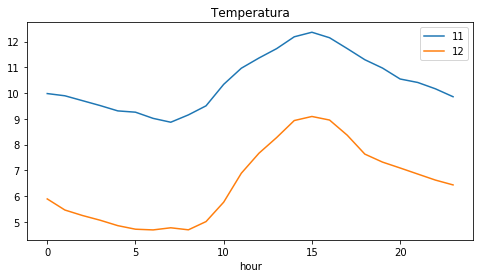

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

for month in monthDay.index.get_level_values("month").unique():
    monthDay["temp"].loc[month].plot(ax=ax, label=month)
ax.set_title("Temperatura")
ax.legend()
plt.show()

hour         0         1         2         3         4         5         6   \
month                                                                         
11     9.979310  9.893333  9.703448  9.513333  9.306667  9.256667  9.016667   
12     5.889655  5.458621  5.244828  5.062069  4.851724  4.713793  4.686207   

hour         7         8         9     ...            14         15  \
month                                  ...                            
11     8.866667  9.151724  9.503333    ...     12.183333  12.360000   
12     4.768966  4.690000  5.009677    ...      8.932258   9.090323   

hour          16         17         18         19         20         21  \
month                                                                     
11     12.146667  11.726667  11.293333  10.970000  10.544828  10.410000   
12      8.951613   8.364516   7.629032   7.319355   7.090323   6.854839   

hour          22        23  
month                       
11     10.164286  9.856667  
12      6.620690  6.433333  

[2 rows x 24 columns]

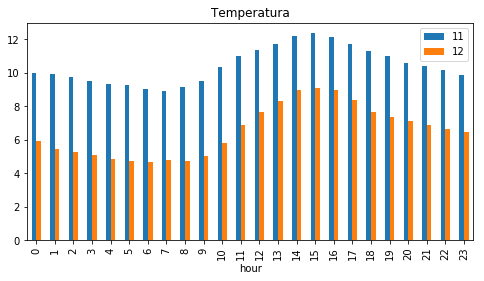

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))

pd.pivot_table(monthDay["temp"].reset_index(), index="month", columns="hour", values="temp").transpose().plot(kind='bar', ax=ax, label=month)
ax.set_title("Temperatura")
ax.legend()
plt.show()

Wygląda na to, że grudniu jest zdecydowanie zimniej. A jak wygląda sytuacja z wiatrem i wilgotnością? Załóżmy, że są to dla nas mniej ważne wskaźniki i chcielibyśmy, żeby zajmowały mniej miejsca na wykresie.

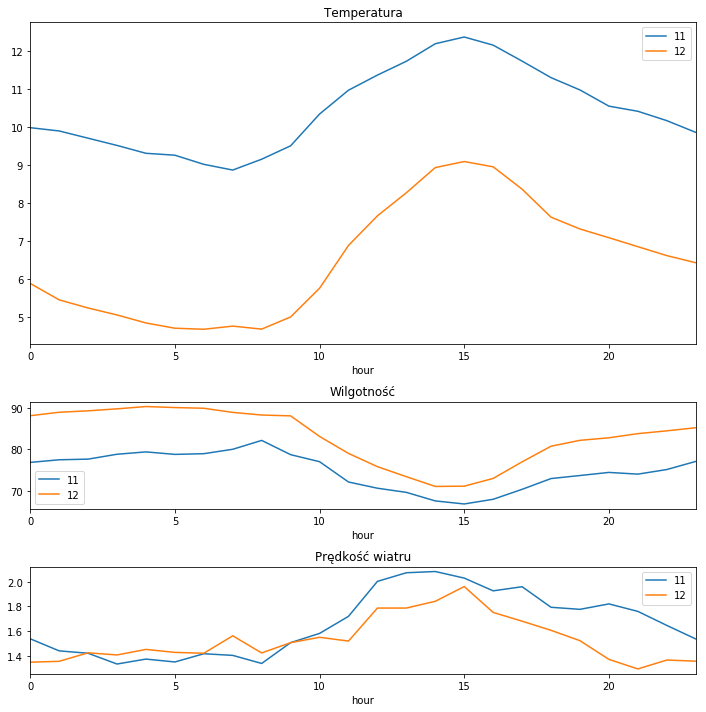

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), gridspec_kw={'height_ratios':[3, 1, 1]})


for month in monthDay.index.get_level_values("month").unique():
    monthDay["temp"].loc[month].plot(ax=ax[0], label=month)
ax[0].legend()
ax[0].set_title("Temperatura")
                                                         
for month in monthDay.index.get_level_values("month").unique():
    monthDay["humidity"].loc[month].plot(ax=ax[1], label=month)
ax[1].legend()
ax[1].set_title("Wilgotność")

for month in monthDay.index.get_level_values("month").unique():
    monthDay["windSpeed"].loc[month].plot(ax=ax[2], label=month)
ax[2].legend()
ax[2].set_title("Prędkość wiatru")
plt.tight_layout()                    
plt.show()
                 

A co gdybyśmy jednak chcieli porównywać wilgotność i temperaturę na jednym wykresie?

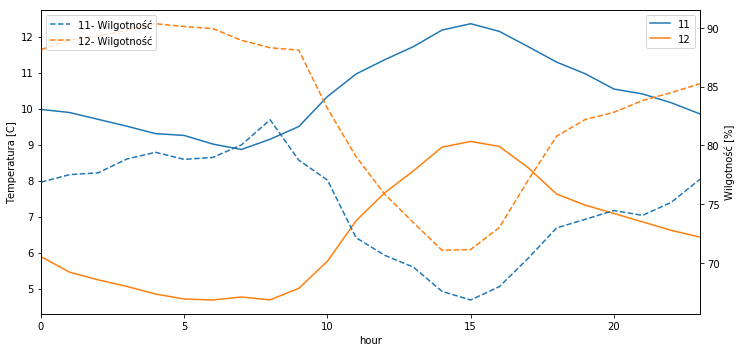

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax1 = ax.twinx()

for month in monthDay.index.get_level_values("month").unique():
    monthDay["temp"].loc[month].plot(ax=ax, label=month)
ax.legend()
# ax[0].set_title("Temperatura")
                                                         
for month in monthDay.index.get_level_values("month").unique():
    monthDay["humidity"].loc[month].plot(ax=ax1, label=str(str(month)+str("- Wilgotność")), style="--")
ax1.legend(loc=2)
fig.tight_layout()

ax.set_ylabel('Temperatura [C]')
ax1.set_ylabel('Wilgotność [%]')
ax1.set_xlabel('Godzina')

# ax[1].set_title("Wilgotność")

# t = np.linspace(0., 10., 100)
# ax1.plot(t, t ** 2, 'b-')
# ax2.plot(t, 1000 / (t + 1), 'r-')
# ax1.set_ylabel('Density (cgs)', color='red')
# ax1.set_ylabel('Temperature (K)', color='blue')
# ax1.set_xlabel('Time (s)')

### Dane o lotniskach i trasach lotniczych
W poniższej sekcji wykorzystamy znany i ciekawy zbiór dotyczacy lotnisk i tras lotniczych.
* https://openflights.org/data.html

Standardowo rozpoczynamy od wczytania zbioru,sprawdzenia ich rozmiarów i typów kolumn, które poprawiamy w razie potrzeby. Pozbędziemy się też niepotrzebnych kolumn.

In [93]:
cols = ['airportID', 'name', 'city', 'country', 'IATA', 'ICAO', 'lat', 'lon', 'altitude', 'timezone', 'DST', 'tz', 'type', 'source']
airports = pd.read_csv("datasets/air/airports.bin",sep=',',names=cols, dtype={'airportID':np.object})
cols = ['airportID', 'name', 'city', 'country', 'IATA', 'ICAO', 'lat', 'lon', 'altitude', 'timezone', 'DST', 'tz']
airports = airports[cols]

cols = ['airline', 'airlineID', 'sourceAirport', 'sourceAirportID', 'destAirport', 'destAirportID', 'codeshare', 'stops', 'equipment']
routes = pd.read_csv("datasets/air/routes.bin",sep=',',names=cols)
cols = ['airline', 'airlineID', 'sourceAirport', 'sourceAirportID', 'destAirport', 'destAirportID', 'stops', 'equipment']
routes = routes[cols]

In [94]:
print("Lotniska", airports.shape, "Trasy", routes.shape)
display(airports.head())
display(routes.head())
print(airports.dtypes)
print(routes.dtypes)

Lotniska (7184, 12) Trasy (67663, 8)


airportID                                         name          city  \
0         1                               Goroka Airport        Goroka   
1         2                               Madang Airport        Madang   
2         3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3         4                               Nadzab Airport        Nadzab   
4         5  Port Moresby Jacksons International Airport  Port Moresby   

            country IATA  ICAO       lat         lon  altitude timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

                     tz  
0  Pacific/Port_Moresby  
1  Pacific/Port_Moresby  
2  Pacific/Port_Moresby  
3  Pacific/Port_Moresby  
4  Pacific/Port_Moresby

airline airlineID sourceAirport sourceAirportID destAirport destAirportID  \
0      2B       410           AER            2965         KZN          2990   
1      2B       410           ASF            2966         KZN          2990   
2      2B       410           ASF            2966         MRV          2962   
3      2B       410           CEK            2968         KZN          2990   
4      2B       410           CEK            2968         OVB          4078   

   stops equipment  
0      0       CR2  
1      0       CR2  
2      0       CR2  
3      0       CR2  
4      0       CR2

airportID     object
name          object
city          object
country       object
IATA          object
ICAO          object
lat          float64
lon          float64
altitude       int64
timezone      object
DST           object
tz            object
dtype: object
airline            object
airlineID          object
sourceAirport      object
sourceAirportID    object
destAirport        object
destAirportID      object
stops               int64
equipment          object
dtype: object


Na wszelki wypadek przed mergowaniem warto sprawdzić dla ilu tras nie uda nam się znaleźć lotniska. Biorąc pod uwagę to, że mamy 67 tys tras, to 850 braków to nie tak źle.

In [95]:
print((~routes.sourceAirportID.isin(airports.airportID)).sum())
print((~routes.sourceAirport.isin(airports.IATA)).sum())
print((~routes.destAirportID.isin(airports.airportID)).sum())
print((~routes.destAirport.isin(airports.IATA)).sum())

845
845
849
849


Robimy merge na odpowiednich kolumnach. Wybieramy opcję inner. W tym przypadku nie zalezy mi na trasach dla których nie potrafię zidentyfikować lotniska. Robimy podwójny merge, żeby dla każdej trasy znać lat i lon zarówno startu jak i lądowania.
* Pytanie, dlaczego nie wybieramy w pierwszym wierszu opcji right? Jakie będą wymiary tabeli gdy zastosujemy opcję right? Czy będzie to dla nas miało sens?

In [100]:
routAir = routes.merge(airports, left_on="sourceAirportID", right_on="airportID", how="inner" )
routAir = routAir.merge(airports, left_on="destAirportID", right_on="airportID", how="left", suffixes=["", "_dest"])
print(routAir.shape)
display(routAir.head())

(66818, 32)


airline airlineID sourceAirport sourceAirportID destAirport destAirportID  \
0      2B       410           AER            2965         KZN          2990   
1      7J      9531           AER            2965         DYU          2979   
2      9U      1073           AER            2965         KIV          1735   
3      B2      1478           AER            2965         MSQ          2954   
4      HY      5281           AER            2965         TAS          2983   

   stops equipment airportID                         name       ...         \
0      0       CR2      2965  Sochi International Airport       ...          
1      0       735      2965  Sochi International Airport       ...          
2      0       EM2      2965  Sochi International Airport       ...          
3      0   735 CRJ      2965  Sochi International Airport       ...          
4      0       767      2965  Sochi International Airport       ...          

  city_dest country_dest IATA_dest ICAO_dest   lat_dest   lon_dest  \
0     Kazan       Russia       KZN      UWKD  55.606201  49.278702   
1  Dushanbe   Tajikistan       DYU      UTDD  38.543301  68.824997   
2  Chisinau      Moldova       KIV      LUKK  46.927700  28.931000   
3   Minsk 2      Belarus       MSQ      UMMS  53.882500  28.030701   
4  Tashkent   Uzbekistan       TAS      UTTT  41.257900  69.281197   

   altitude_dest timezone_dest DST_dest          tz_dest  
0          411.0             3        N    Europe/Moscow  
1         2575.0             5        U    Asia/Dushanbe  
2          399.0             2        E  Europe/Chisinau  
3          670.0             3        E     Europe/Minsk  
4         1417.0             5        U   Asia/Samarkand  

[5 rows x 32 columns]

Wydaje się być interesujące, żeby znać długość tras. Nikt tego za nas nie policzył, ale na szczęście mamy współrzędne obydwu lotnisk (pomijamy tutaj międzylądowania).
Proste zapytanie podpowiada, że pakeit geopy nam pomoże.

In [103]:
from geopy.distance import vincenty

In [115]:
distances = []
for k,l,x,y in zip(routAir.lat, routAir.lon, routAir.lat_dest, routAir.lon_dest):
    try:
        distances.append(vincenty((x,y), (k,l)).meters/1000)
    except:
        distances.append(np.nan)
routAir["distance"] = distances

Wybierzmy tylko te loty które startują na Europejskich lotniskach.

In [116]:
euro = routAir.loc[routAir.tz.str.contains("Europe")]
euro.shape

(19954, 33)

Policzmy teraz jakieś interesujące agregaty.

In [125]:
euroAir = euro.groupby("airportID").agg({"airline":"count", "distance":"mean"})

In [173]:
euroAir["size"] = np.sqrt(euroAir.airline)
euroAir["sqrDistance"] = np.sqrt(euroAir.distance)

In [132]:
euroAir = euroAir.reset_index()

In [134]:
# Mamy tylko jedną wspólną kolumnę, więc Pandas domyśla się po czym mergować
euroAir = euroAir.merge(airports)


Teraz możemy zrobić odrobinę ciekawszy rysunek. Postaramy się narysować lotniska, z uwzględnieniem ich położenia geograficznego, wielkości lotniska mieżonego średnią liczbą lotów oraz średniego dystansu obsługiwanych lotów.

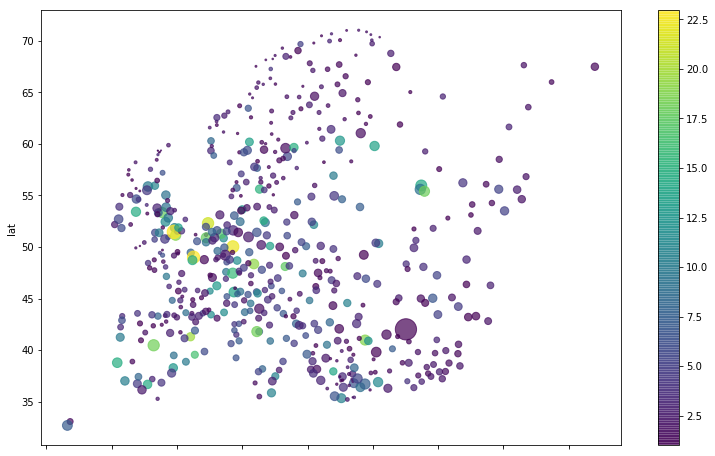

In [176]:
import matplotlib.cm as cmaps
euroAir.plot("lon", "lat", kind="scatter", figsize=(13,8), s=euroAir["distance"]/25, alpha=0.7, c=euroAir["size"], cmap=cmaps.viridis)

Wykres może i ladny, ale tak długo jak niedokładnie mapujemy współrzędne geograficzne i nie widzimy konturów państw na wiele się nie zdaje.

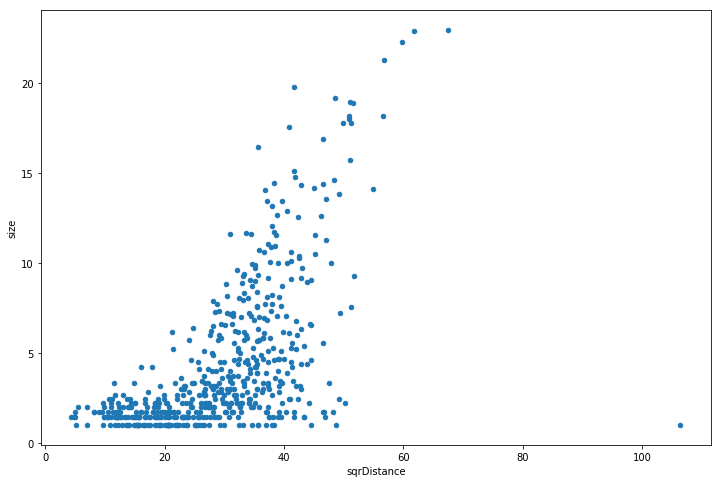

In [174]:
euroAir.plot("sqrDistance", "size", kind="scatter", figsize=(12,8))

In [170]:
euroAir.loc[euroAir.logDistance>100]

airportID  airline      distance  size           name   city country IATA  \
508      6783        1  11311.635568   1.0  Sinop Airport  Sinop  Turkey  SIC   

     ICAO      lat        lon  altitude timezone DST               tz  \
508  LTCM  42.0158  35.066399        20        3   E  Europe/Istanbul   

     logDistance  
508   106.356173